Please type UTM coordinates for Northing.
Degrees: 51
Minutes: 12
Seconds: 34.096
Please type UTM coordinates for Easting.
Degrees: 3
Minutes: 13
Seconds: 31.746
Latitude is 51.209471111111114 and Longitude is 3.225485. Proceed? 
y or n: y
Which library would you like to use for a 3D plot of your location?
matplotlib or plotly: matplotlib


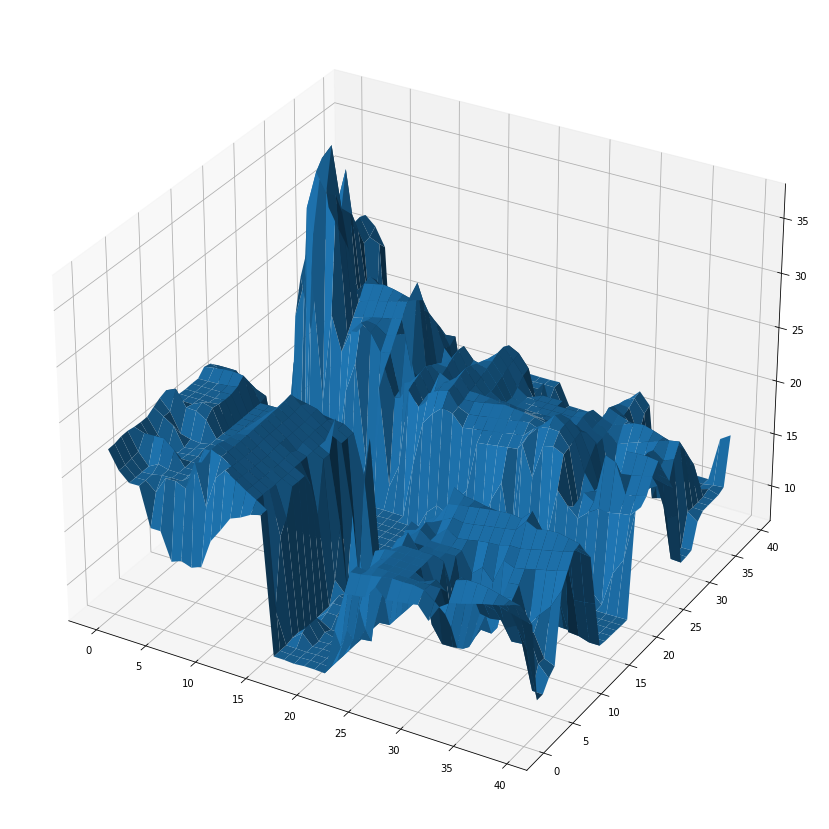

In [6]:
# Import the libraries
import numpy as np
import pandas as pd 
import rasterio
import pyproj
from rasterio.windows import from_bounds
from rasterio.plot import show
from rasterio.windows import Window
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

# write a program that inputs DMS and converts into long., lat., x- and y- coor. and outputs a 3D-plot
def main ():
    print ("Please type UTM coordinates for Northing.") # input Northing
    n_degrees = int(input("Degrees: "))
    n_minutes = int(input("Minutes: "))
    n_seconds = float(input("Seconds: "))
    
    print("Please type UTM coordinates for Easting.") # input Easting
    e_degrees = int(input("Degrees: "))
    e_minutes = int(input("Minutes: "))
    e_seconds = float(input("Seconds: "))
    
    #convert DMS to Decimal
    latitude = n_degrees + (n_minutes/60) + (n_seconds/3600)
    longitude = e_degrees + (e_minutes/60) + (e_seconds/3600) 
    print ("Latitude is {} and Longitude is {}. Proceed? ".format(latitude, longitude))
    
    # convert decimal to x and y coordinate
    choice = input("y or n: ")
    if choice == "y":
        transformer = pyproj.Transformer.from_crs('epsg:4326', 'epsg:31370')
        x_coor, y_coor = transformer.transform(latitude, longitude)
        
        # choose bounds
        left = x_coor - 20
        right = x_coor + 20
        bottom = y_coor - 20
        top = y_coor + 20
        
        # load the data, make a window from the data, transform numpy ndarray into dataframe
        data = rasterio.open('/Users/nicolasdemuynck/BeCode/Github/finalchallenge/tif files finalchallenge/DHMVIIDSMRAS1m_k13.tif')
        xy_window = data.read(1, window=from_bounds(left, bottom, right, top, data.transform))
        dataframe = pd.DataFrame(xy_window)
        
        # extracting the X, Y, Z to make a 3D-plot
        x = dataframe.columns # of x = np.arange(len(dataframe.columns)) // array of x- values
        y = dataframe.index # array of y- values

        X,Y = np.meshgrid(x,y) # create a rectangular grid out of an array of x- and y- values.
        Z = dataframe
        
        # 3D plot
        print ("Which library would you like to use for a 3D plot of your location?")
        library = input ("matplotlib or plotly: ")
        
        if library == "matplotlib":
            fig = plt.figure(figsize=(20,15))
            ax = fig.add_subplot(111, projection='3d')
            ax.plot_surface(X, Y, Z)
            plt.show ()
            
        if library == 'plotly':
            fig = go.Figure(data=[go.Surface(z=dataframe.values)])
            fig.update_layout(title = 'Your location in 3D', autosize = False, width = 1000, height = 1000)
            fig.show()
        
    if choice == 'n':
         print("No fun today. Will self destruct in 5...4..3...2...1...just joking.")
            
if __name__ == "__main__":
    main()